# Example usage of Stokes Class

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pybbtd.stokes as stokes
import pybbtd.btd as btd
import matplotlib.pyplot as plt
import pybbtd as pybbtd

In [3]:
# Create Stokes model
R = 2
L = 2
btd.validate_R_L(R, L)
X = stokes.Stokes([30, 30], R, L)

Sufficient condition for uniqueness satisfied
Stokes tensor initialized with dimensions (30, 30, 4) on LL1 mode.


In [4]:
# Create ground truth tensor
np.random.seed(10)
[A0, B0, C0], T0 = X.generate_stokes_tensor()

In [8]:
theta = X.get_constraint_matrix()
Tnoisy = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 0  * np.random.randn(*X.dims)

In [9]:
np.random.seed(10)
X.fit(
    data=Tnoisy,
    algorithm="ADMM",
    init="random",
    max_iter=1000,
    rho=1,
    max_admm=1,
    rel_tol=10**-8,
    abs_tol=10**-14,
    admm_tol=10**-10,
)

Reached absolute tolerance threshold. Exiting.


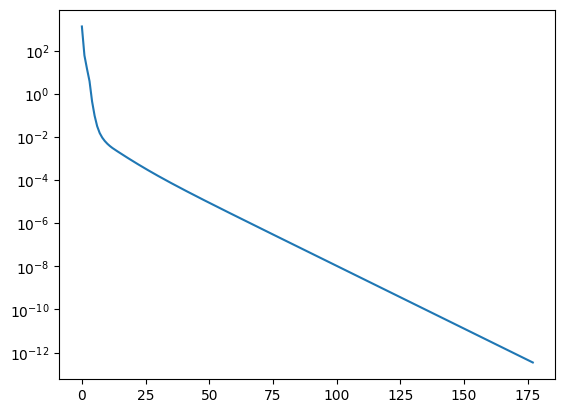

In [11]:
plt.semilogy(X.fit_error)

In [13]:
stokes.validate_stokes_tensor(Tnoisy)

All pixels satisfy the Stokes constraints.
